In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
text_col= ['director', 'cast', 'country']
for col in text_col:
    data[col]=data[col].fillna("Unknown")


In [6]:
data=data.dropna(subset=['date_added', 'rating'])
data['duration']= data['duration'].fillna('Unknown')

In [7]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
data['date_added']=data['date_added'].str.strip()
data['date_added']=pd.to_datetime(data['date_added'])
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [9]:
data['duration_int']=data['duration'].str.extract('(\d+)').astype('float')
data['duration_type']=data['duration'].str.extract('([A-Za-z]+)')

In [10]:
# EDA (single variable)
#Q1. How many Movies vs TV Shows are there?
data['type'].value_counts()

type
Movie      6129
TV Show    2664
Name: count, dtype: int64

In [11]:
#Q2. What are the top 10 genres?
data['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [12]:
#Q3. What are the top 10 countries producing content?
data['country'].value_counts().head(10)

country
United States     2812
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [13]:
#Q4. What are the most common age ratings?
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [14]:
#Q5. What is the distribution of release years?
data['release_year'].value_counts().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1031
2018    1146
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

**summary (report):**

>Netflix catalog is movie-heavy (70% movies).
>Genres like International movies, Dramas, Comedies dominate.
>USA and India are the top contributors to Netflix’s content library.
>Netflix has a strong adult-oriented content portfolio (TV-MA, TV-14).
>Most content is released after 2010, with heavy growth in 2018–2020.

In [15]:
# bivariate EDA
#Q6. Movies vs TV Shows by Rating
data.groupby(['type','rating']).size().unstack().fillna(0)

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1.0,1.0,1.0,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2062.0,540.0,131.0,139.0,5.0,3.0
TV Show,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,730.0,94.0,1143.0,321.0,175.0,194.0,1.0,0.0


In [16]:
#Q7. Content added per year (not release year)
data['year_added'].value_counts().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     428
2017    1186
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

In [17]:
#Q8. Top genres for Movies vs TV Shows
data.groupby('type')['listed_in'].value_counts()

type     listed_in                                                
Movie    Dramas, International Movies                                 362
         Documentaries                                                359
         Stand-Up Comedy                                              334
         Comedies, Dramas, International Movies                       274
         Dramas, Independent Movies, International Movies             252
                                                                     ... 
TV Show  Docuseries, Science & Nature TV, TV Dramas                     1
         Docuseries, TV Sci-Fi & Fantasy                                1
         International TV Shows, Kids' TV, TV Mysteries                 1
         International TV Shows, Korean TV Shows, TV Horror             1
         International TV Shows, Reality TV, TV Action & Adventure      1
Name: count, Length: 513, dtype: int64

In [18]:
#Q9. Average movie duration
movie_data= data[data['type']=='Movie']
movie_data['duration_int'].mean()

99.58488410055502

**Summary (Bivariate EDA report):**

>Netflix content is heavily adult-oriented, with most titles rated TV-MA & TV-14.
>Content additions peaked in 2018–2020, showing explosive growth.
>Movies focus on International, Drama, Comedy, Stand-up, while TV shows focus on niche and multi-genre categories.
>Average movie length is ~100 minutes, matching global film standards.

<Axes: xlabel='year_added'>

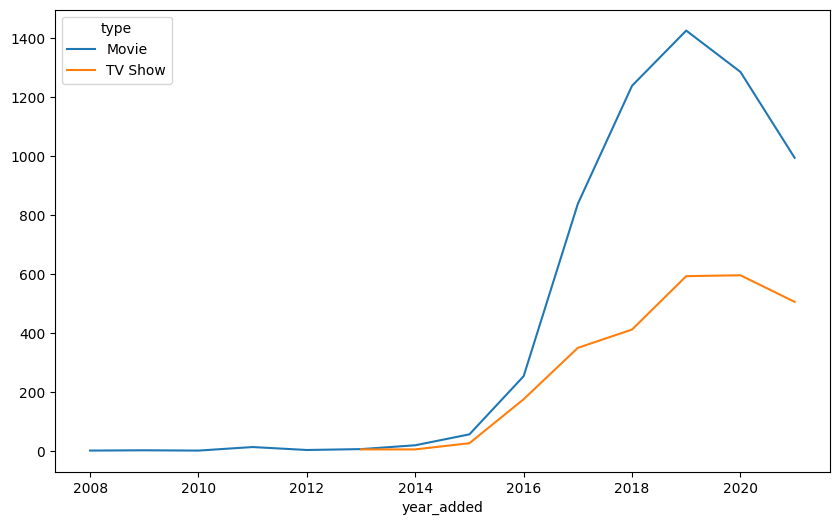

In [19]:
#Multivariate EDA
# Q10. Trend of Movies vs TV Shows added over the years
data.groupby(['year_added','type']).size().unstack().plot(kind='line', figsize=(10,6))

In [20]:
#Q11. Which countries produce more Movies vs TV Shows?
data.groupby(['country','type']).size().unstack().fillna(0).sort_values('Movie', ascending=False).head(10)

type,Movie,TV Show
country,,
United States,2058.0,754.0
India,893.0,79.0
Unknown,439.0,390.0
United Kingdom,206.0,212.0
Canada,122.0,59.0
Spain,97.0,48.0
Egypt,92.0,14.0
Nigeria,86.0,9.0
Indonesia,77.0,2.0


In [21]:
#Q12. What genres are most common within each rating?
data.groupby(['rating'])['listed_in'].value_counts().head(20)

rating  listed_in                                           
66 min  Movies                                                   1
74 min  Movies                                                   1
84 min  Movies                                                   1
G       Children & Family Movies                                15
        Children & Family Movies, Comedies                       6
        Children & Family Movies, Dramas                         4
        Children & Family Movies, Documentaries                  2
        Children & Family Movies, Classic Movies, Comedies       2
        Classic Movies, Dramas                                   1
        Classic Movies, Comedies, Music & Musicals               1
        Children & Family Movies, Music & Musicals               1
        Children & Family Movies, Comedies, Sci-Fi & Fantasy     1
        Children & Family Movies, Comedies, Music & Musicals     1
        Children & Family Movies, Classic Movies                 1
 

<Axes: xlabel='release_year'>

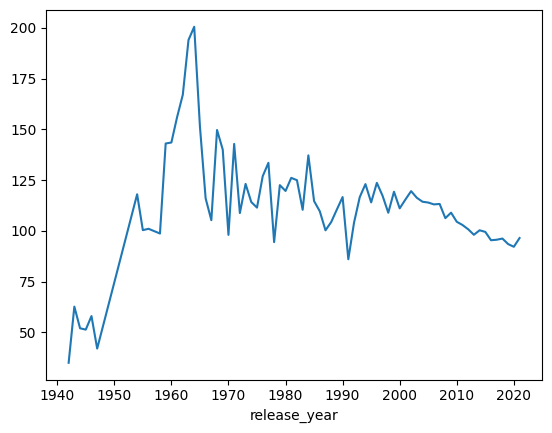

In [22]:
#Q13. Are newer movies longer or shorter than older ones?
movie_data.groupby('release_year')['duration_int'].mean().plot()

**Summary (for multivariate analysis):**

1. **Netflix saw explosive content growth between 2016–2020.**

Movies peaked at ~1200 additions/year, TV shows at ~600.

2. **The United States leads content production, followed by India and the UK.**

This shows Netflix’s reliance on global markets, especially India and Asia.

3. **Genre-rating combinations follow logical patterns:**

Kids genres → PG, G, TV-Y

Mature genres → TV-MA

Drama, Romance → TV-14

4. **Movie duration has decreased from 150–190 minutes (1950–1980) to ~100 minutes today.**

This matches modern audience preferences.

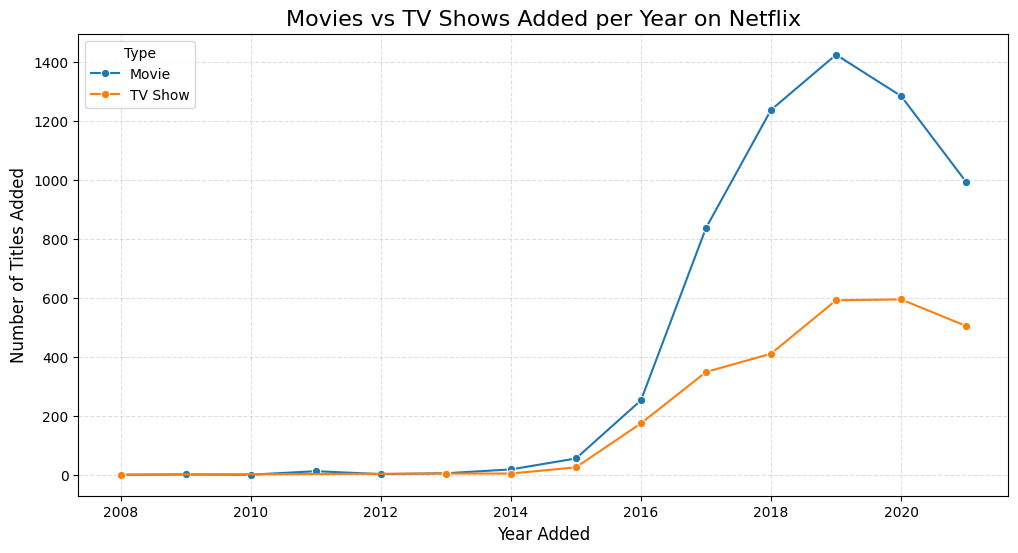

In [23]:
# Movies vs TV Shows Added Per Year (Line Chart)
plt.figure(figsize=(12,6))
sns.lineplot(data=data.groupby(['year_added','type']).size().reset_index(name='count'),
             x='year_added', y='count', hue='type', marker="o")

plt.title("Movies vs TV Shows Added per Year on Netflix", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Type")
plt.show()


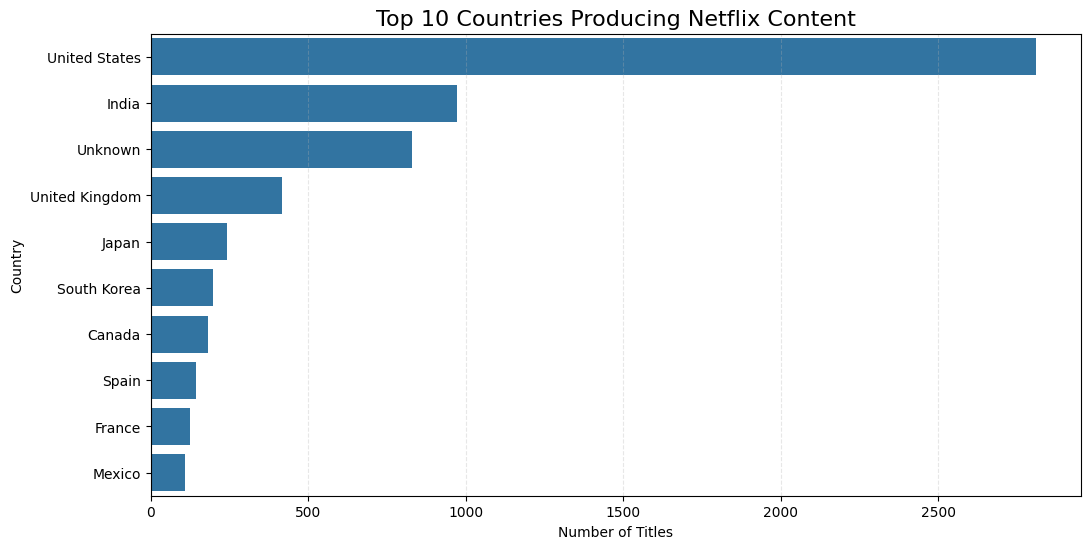

In [24]:
# Top 10 Content-Producing Countries (Horizontal Bar Chart)
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)

plt.title("Top 10 Countries Producing Netflix Content", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.grid(axis='x', linestyle="--", alpha=0.3)
plt.show()

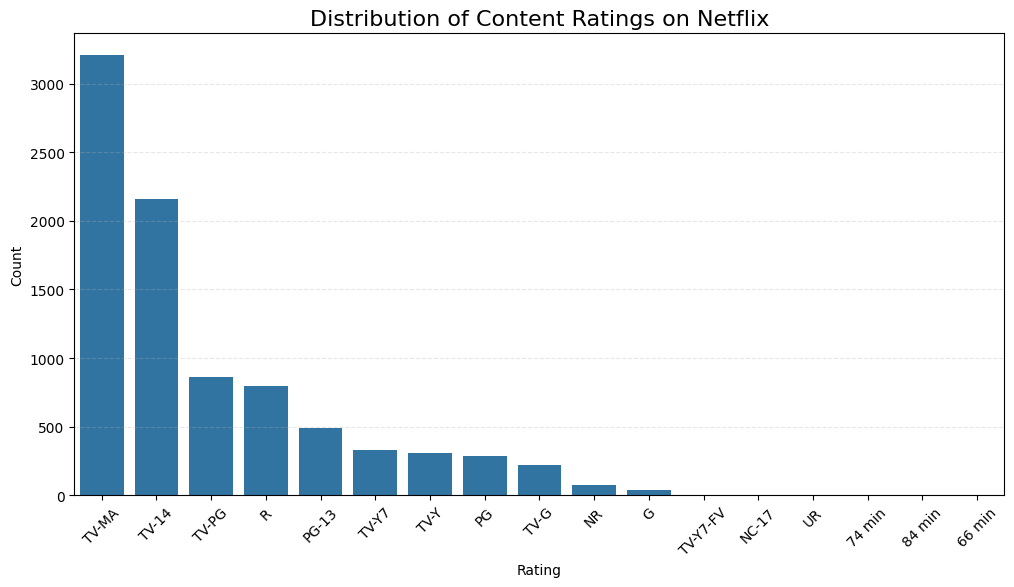

In [25]:
#Ratings Distribution (Bar Chart)
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)

plt.title("Distribution of Content Ratings on Netflix", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.3)
plt.show()